# Rutishauser Open Dataset

Exploring an openly avaialble NWB formatted dataset from the Rutishauser lab. 

Github: https://github.com/rutishauserlab/recogmem-release-NWB

In [1]:
import os
from os.path import join as pjoin

import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

from pynwb import NWBFile, NWBHDF5IO

### Data Organizations

In [2]:
# Set the data path
data_path = '/Users/tom/Desktop/HumanSingleNeurons/RutishauserSU/'

In [3]:
# Get a list of available files
files = os.listdir(data_path)

In [4]:
# Check how many files are available
n_files = len(files)
print('Number of NWB files:  {}'.format(n_files))

Number of NWB files:  87


### Load File

In [5]:
# Read in an example NWB file
file_ind = 2
io = NWBHDF5IO(pjoin(data_path, files[file_ind]), 'r')
nwbfile = io.read()

In [6]:
# Check identifier
print(nwbfile.identifier)

H10_7


In [7]:
# Check the overall contents of the file
nwbfile

root pynwb.file.NWBFile at 0x140717816447616
Fields:
  acquisition: {
    events <class 'pynwb.misc.AnnotationSeries'>,
    experiment_ids <class 'pynwb.base.TimeSeries'>
  }
  data_collection: learning: 80, recognition: 81
  devices: {
    Neuralynx-cheetah <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    Neuralynx-cheetah-microwires-1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-13 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-14 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-15 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-16 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-17 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-18 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-19 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-2 <class 'pynwb.ecephys.ElectrodeGroup'>,
   

In [8]:
# Examine a particular sub-field, for example subject
nwbfile.subject

subject pynwb.file.Subject at 0x140717883709184
Fields:
  age: 37
  description: Left Lateral Frontal
  sex: M
  species: Human
  subject_id: P10HMH

## Electrodes

In [9]:
nwbfile.electrodes

electrodes hdmf.common.table.DynamicTable at 0x140717883708944
Fields:
  colnames: ['x' 'y' 'z' 'imp' 'location' 'filtering' 'group' 'group_name'
 'origChannel']
  columns: (
    x <class 'hdmf.common.table.VectorData'>,
    y <class 'hdmf.common.table.VectorData'>,
    z <class 'hdmf.common.table.VectorData'>,
    imp <class 'hdmf.common.table.VectorData'>,
    location <class 'hdmf.common.table.VectorData'>,
    filtering <class 'hdmf.common.table.VectorData'>,
    group <class 'hdmf.common.table.VectorData'>,
    group_name <class 'hdmf.common.table.VectorData'>,
    origChannel <class 'hdmf.common.table.VectorData'>
  )
  description: metadata about extracellular electrodes
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [10]:
# Check the number of microwires
n_wires = len(nwbfile.electrodes.id[:])
print(n_wires)

18


In [11]:
# Check the unique locations
set(nwbfile.electrodes.location[:])

{'Left Amygdala', 'Right Amygdala', 'Right Hippocampus'}

In [12]:
# Check electrode group information for an example microwire
nwbfile.electrode_groups['Neuralynx-cheetah-microwires-1']

Neuralynx-cheetah-microwires-1 pynwb.ecephys.ElectrodeGroup at 0x140717883709520
Fields:
  description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)
  device: Neuralynx-cheetah pynwb.device.Device at 0x140717883709280
  location: Right Amygdala

## Trial Structure

In [13]:
# Check out the acquisition field
nwbfile.acquisition

{'events': events pynwb.misc.AnnotationSeries at 0x140717883521536
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (1004,), type "|O">
   description:  The events coorespond to the TTL markers for each trial. For the learning trials, the TTL markers 
             are the following: 55 = start of the experiment, 1 = stimulus ON, 2 = stimulus OFF, 3 = Question Screen Onset [“Is this an animal?”], 
             20 = Yes (21 = NO) during learning, 6 = End of Delay after Response, 66 = End of Experiment. For the recognition trials, 
             the TTL markers are the following: 55 = start of experiment, 1 = stimulus ON, 2 = stimulus OFF, 3 = Question Screen Onset [“Have you seen this image before?”], 
             31:36 = Confidence (Yes vs. No) response [31 (new, confident), 32 (new, probably), 33 (new, guess), 34 (old, guess), 
             35 (old, probably), 36 (old, confident)], 66 = End of Experiment
   interval: 1
   resolution: -1.0
   tim

In [14]:
nwbfile.acquisition['events'].timestamps.shape

(1004,)

In [15]:
nwbfile.intervals

{'trials': trials pynwb.epoch.TimeIntervals at 0x140717883777904
 Fields:
   colnames: ['start_time' 'stop_time' 'stim_on_time' 'stim_off_time' 'delay1_time'
  'delay2_time' 'stim_phase' 'stimCategory' 'category_name'
  'external_image_file' 'new_old_labels_recog' 'response_value'
  'response_time']
   columns: (
     start_time <class 'hdmf.common.table.VectorData'>,
     stop_time <class 'hdmf.common.table.VectorData'>,
     stim_on_time <class 'hdmf.common.table.VectorData'>,
     stim_off_time <class 'hdmf.common.table.VectorData'>,
     delay1_time <class 'hdmf.common.table.VectorData'>,
     delay2_time <class 'hdmf.common.table.VectorData'>,
     stim_phase <class 'hdmf.common.table.VectorData'>,
     stimCategory <class 'hdmf.common.table.VectorData'>,
     category_name <class 'hdmf.common.table.VectorData'>,
     external_image_file <class 'hdmf.common.table.VectorData'>,
     new_old_labels_recog <class 'hdmf.common.table.VectorData'>,
     response_value <class 'hdmf.common

In [16]:
# Check the column names for the trial 
nwbfile.intervals['trials'].colnames

('start_time',
 'stop_time',
 'stim_on_time',
 'stim_off_time',
 'delay1_time',
 'delay2_time',
 'stim_phase',
 'stimCategory',
 'category_name',
 'external_image_file',
 'new_old_labels_recog',
 'response_value',
 'response_time')

In [17]:
# Check the number of trials
n_trials = len(nwbfile.intervals['trials']['start_time'])
print(n_trials)

200


In [18]:
# Check some of the event structure data
print(nwbfile.intervals['trials']['start_time'][0:5])
print(nwbfile.intervals['trials']['stim_on_time'][0:5])
print(nwbfile.intervals['trials']['category_name'][0:5])

[5850.331408 5854.557488 5858.237848 5864.813608 5869.181048]
[5850.331408 5854.557488 5858.237848 5864.813608 5869.181048]
['smallAnimal' 'phones' 'landscapes' 'mobility' 'mobility']


In [19]:
# Check the set of possible stimuli
print(set(nwbfile.intervals['trials']['category_name'][:]))

{'landscapes', 'smallAnimal', 'phones', 'houses', 'mobility'}


In [20]:
def get_cond_inds(nwbfile, condition):
    """Helper function to extract indices for particular trial conditions."""
    
    inds = []
    for ind, value in enumerate(nwbfile.intervals['trials']['category_name'][:]):
        if value == condition:
            inds.append(ind)
    return inds

In [21]:
# Find indices for particular trial conditions
animal_inds = get_cond_inds(nwbfile, 'smallAnimal')
phone_inds = get_cond_inds(nwbfile, 'phones')
landscape_inds = get_cond_inds(nwbfile, 'landscapes')

### Check out stimuli

Note: I don't think I have the colormaps set quite right, which probably explains the seemingly odd colouring.

In [22]:
nwbfile.stimulus

{'StimulusPresentation': StimulusPresentation pynwb.image.OpticalSeries at 0x140717883522928
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (200, 400, 300, 3), type "|u1">
   description: no description
   dimension: <HDF5 dataset "dimension": shape (3,), type "<i4">
   distance: 0.7
   field_of_view: <HDF5 dataset "field_of_view": shape (3,), type "<f8">
   format: raw
   interval: 1
   orientation: lower left
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (200,), type "<f8">
   timestamps_unit: seconds
   unit: meters}

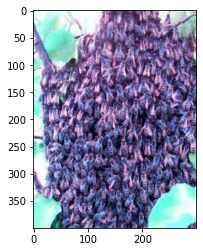

In [23]:
plt.imshow(nwbfile.stimulus['StimulusPresentation'].data[0, :, :, :])

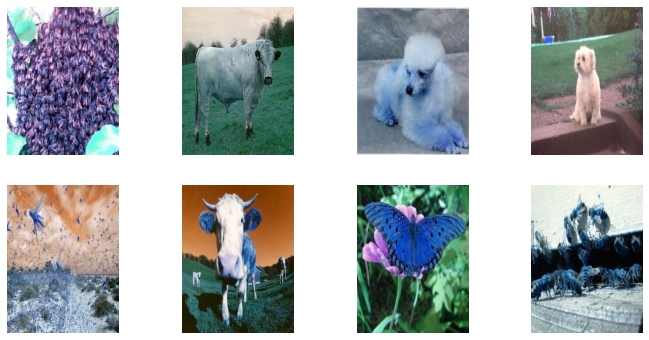

In [24]:
# Plot a collection of animal images
_, axes = plt.subplots(2, 4, figsize=(12, 6))
for ind, ax in enumerate(axes.flatten()):
    ax.imshow(nwbfile.stimulus['StimulusPresentation'].data[animal_inds[ind], :, :, :])
    ax.set_axis_off()

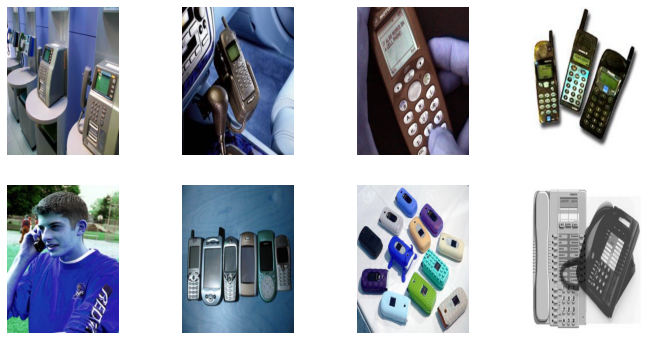

In [25]:
# Plot a collection of animal images
_, axes = plt.subplots(2, 4, figsize=(12, 6))
for ind, ax in enumerate(axes.flatten()):
    ax.imshow(nwbfile.stimulus['StimulusPresentation'].data[phone_inds[ind], :, :, :])
    ax.set_axis_off()

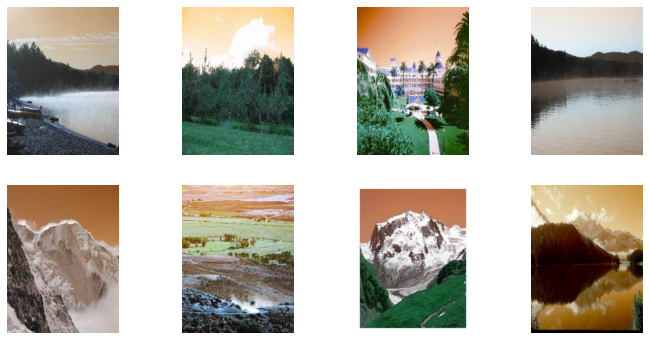

In [26]:
# Plot a collection of animal images
_, axes = plt.subplots(2, 4, figsize=(12, 6))
for ind, ax in enumerate(axes.flatten()):
    ax.imshow(nwbfile.stimulus['StimulusPresentation'].data[landscape_inds[ind], :, :, :])
    ax.set_axis_off()

### Units

In [27]:
# Check column names available for the units data
nwbfile.units.colnames

('origClusterID',
 'waveform_mean_encoding',
 'waveform_mean_recognition',
 'IsolationDist',
 'SNR',
 'waveform_mean_sampling_rate',
 'spike_times',
 'electrodes')

In [28]:
# Check how many units in the current file
n_units = len(nwbfile.units.SNR)
print(n_units)

38


#### Spike Waveforms

In [29]:
# Grab the spike waveforms
waveform_encoding = nwbfile.units['waveform_mean_encoding']
waveform_recognition = nwbfile.units['waveform_mean_recognition']

In [30]:
# Check the shapes of waveform
print(waveform_encoding.shape)
print(waveform_recognition.shape)

(38, 256)
(38, 256)


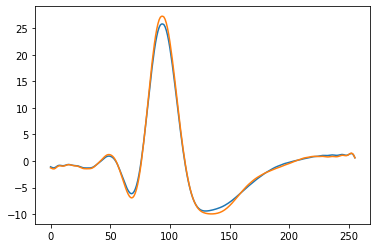

In [31]:
# PLot waveforms, for both experiment phases
ind = 2
plt.plot(waveform_encoding[ind, :])
plt.plot(waveform_recognition[ind, :])

#### Spike Times

In [32]:
# Helper functions
import numpy as np
def compute_spike_rate(spikes):
    """Estimate spike rate from a vector of spike times, in seconds."""
    return len(spikes) / (spikes[-1] - spikes[0])

def get_spike_time_range(spikes, tmin, tmax):
    """Extract spike times for a particular time range."""
    
    return spikes[np.squeeze(np.logical_and([spikes > tmin], [spikes < tmax]))]

In [33]:
# Pull out the spike times from NWB file
spike_times = nwbfile.units.spike_times

In [34]:
# Check out some descriptions of spike times
print(nwbfile.units.spike_times.description)
print(nwbfile.units.spike_times.shape)

the spike times for each unit
(97804,)


Note that the spike times are stored in one long 1d vector, with all spike times. 

To get the times corresponding to an individual unit, there is the `get_unit_spike_times` function.

In [35]:
# Get spike times for a couple unitss
u0_spikes = nwbfile.units.get_unit_spike_times(0)
u1_spikes = nwbfile.units.get_unit_spike_times(1)

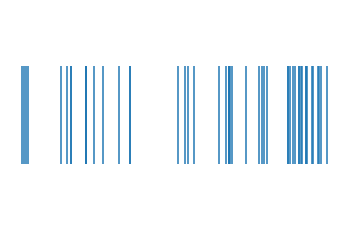

In [36]:
# Plot an improvised raster of a series of spikes
plt.eventplot(u0_spikes[0:50])
plt.axis('off');

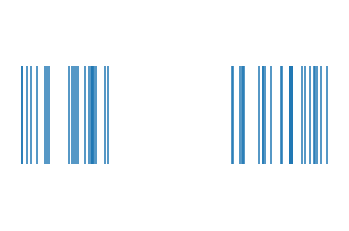

In [37]:
# Plot an improvised raster of a series of spikes
plt.eventplot(u1_spikes[0:50])
plt.axis('off');

In [38]:
# Extract spike times for a particular time range
tmin, tmax = 2000, 2030
u0_tt = get_spike_time_range(u0_spikes, tmin, tmax)
u1_tt = get_spike_time_range(u1_spikes, tmin, tmax)

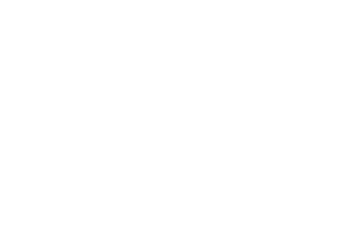

In [39]:
plt.eventplot([u0_tt, u1_tt], colors=['b', 'r'], linelengths=0.75)
plt.axis('off');

In [40]:
# Estimate average spike rate (across whole recording)
u0_rate = compute_spike_rate(u0_spikes)
u1_rate = compute_spike_rate(u1_spikes)

In [41]:
print('U0 spike rate:  {:4.2f}'.format(u0_rate))
print('U1 spike rate:  {:4.2f}'.format(u1_rate))

U0 spike rate:  0.68
U1 spike rate:  0.77


### Spike rates around a particular event

In [42]:
stim_ons = nwbfile.intervals['trials']['stim_on_time'][:]
stim_offs = nwbfile.intervals['trials']['stim_off_time'][:]

In [43]:
# Check the average amout of time the image is on screen
print('Stim duration:  {:4.4f} seconds'.format(np.median(stim_offs - stim_ons)))

Stim duration:  0.9992 seconds


In [44]:
# Get the stimulation times for individual conditions
animal_stim_times = [stim_ons[ind] for ind in animal_inds]
phone_stim_times = [stim_ons[ind] for ind in phone_inds]
landscape_stim_times = [stim_ons[ind] for ind in landscape_inds]

In [45]:
def compute_spike_diffs(spike_times, trial_times, window=1, return_diff=True):
    """Compute the average difference in spike firing pre vs post time point of interest."""
    
    spike_diffs = []
    spikes = []
    for trial_time in trial_times:
    
        pre_spikes = get_spike_time_range(spike_times, trial_time-window, trial_time)
        post_spikes = get_spike_time_range(spike_times, trial_time, trial_time+window)

        spikes.append(np.hstack([pre_spikes - trial_time, post_spikes  - trial_time]))
        spike_diffs.append(len(post_spikes) - len(pre_spikes))
        
    if return_diff:
        return np.mean(spike_diffs)
    return spikes

In [46]:
# Check the average spike difference for a couple neurons
stim_times = phone_stim_times
print(compute_spike_diffs(u0_spikes, stim_times))
print(compute_spike_diffs(u1_spikes, stim_times))

0.25
0.175


### Run Analysis Across all neurons

In [47]:
spike_diffs = {}
for spike_ind in range(n_units):
    
    spikes = nwbfile.units.get_unit_spike_times(spike_ind)
    spike_diff = compute_spike_diffs(spikes, stim_times)
    spike_diffs['unit_' + str(spike_ind)] = spike_diff

In [48]:
min_unit = min(spike_diffs, key=spike_diffs.get)
max_unit = max(spike_diffs, key=spike_diffs.get)

print("Min:  {}  {:5.2f}".format(min_unit, spike_diffs[min_unit]))
print("Max:  {}  {:5.2f}".format(max_unit, spike_diffs[max_unit]))

Min:  unit_32  -1.35
Max:  unit_34   2.35


In [49]:
ind = 34
trial_spikes = compute_spike_diffs(nwbfile.units.get_unit_spike_times(ind), stim_times, return_diff=False)

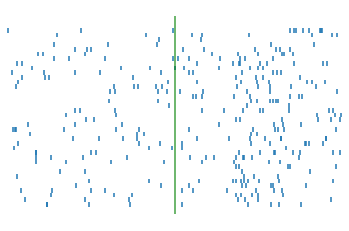

In [50]:
plt.eventplot(trial_spikes);
plt.vlines(0, -1, len(trial_spikes) + 1, color='green', alpha=0.75);
plt.xlim([-1, 1])
plt.axis('off');

In [51]:
# Reconstruct number of pre & post stim neurons
n_pre, n_post = [], []
for trial in trial_spikes:
    n_pre.append(sum(trial < 0))
    n_post.append(sum(trial > 0))

In [52]:
# Check for a significant change in firing
ttest_rel(n_pre, n_post)

Ttest_relResult(statistic=-6.214130598448701, pvalue=2.611295701992732e-07)

In [53]:
# Check where this unit is
orig_ch_ind = nwbfile.units.electrodes[ind, 'origChannel']
print(orig_ch_ind)

23


In [54]:
# Check electrode group information for an example microwire
nwbfile.electrode_groups['Neuralynx-cheetah-microwires-' + str(orig_ch_ind)]

Neuralynx-cheetah-microwires-23 pynwb.ecephys.ElectrodeGroup at 0x140717883710576
Fields:
  description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)
  device: Neuralynx-cheetah pynwb.device.Device at 0x140717883709280
  location: Left Amygdala